# Week 7 Group activity

# 1. Read the data into python

In [1]:
# Import the required libraries and load the dataset 
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
week7_data = pd.read_csv('Week_7_Activity_data.csv')

In [2]:
week7_data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,8.316766,214.373394,22018.41744,8.059332,356.886136,363.266516,18.436525,100.341674,4.628771
1,9.092223,181.101509,17978.98634,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075
2,5.584087,188.313324,28748.68774,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708
3,10.223862,248.071735,28749.71654,7.513408,393.663395,283.651634,13.789695,84.603556,2.672989
4,8.635849,203.361523,13672.09176,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425


In [3]:
# Check the column names in the dataset
week7_data.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity'],
      dtype='object')

In [8]:
# Check the data type of each column
week7_data.dtypes

ph                 float64
Hardness           float64
Solids             float64
Chloramines        float64
Sulfate            float64
Conductivity       float64
Organic_carbon     float64
Trihalomethanes    float64
Turbidity          float64
dtype: object

# 2. Check for null values


In [9]:
#Use isna and sum functions to determine the number of null values in each column
week7_data.isna().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
dtype: int64

# Inference :  We could see that there are no null values in any of the columns

# 3. Examine the variables ‘Hardness’, ‘Sulfate’, and ‘Organic_carbon’ and comment on your observations.


In [67]:
# Use describe functions for the required columns to evaluate the statistical values 
week7_data[["Hardness","Sulfate","Organic_carbon"]].describe()

,Hardness,Sulfate,Organic_carbon
count,2011.000000,2011.000000,2011.000000
mean,195.968072,333.224672,14.357709
std,32.635085,41.205172,3.324959
min,73.492234,129.000000,2.200000
25%,176.744938,307.632511,12.124105
50%,197.191839,332.232177,14.322019
75%,216.441070,359.330555,16.683049
max,317.338124,481.030642,27.006707


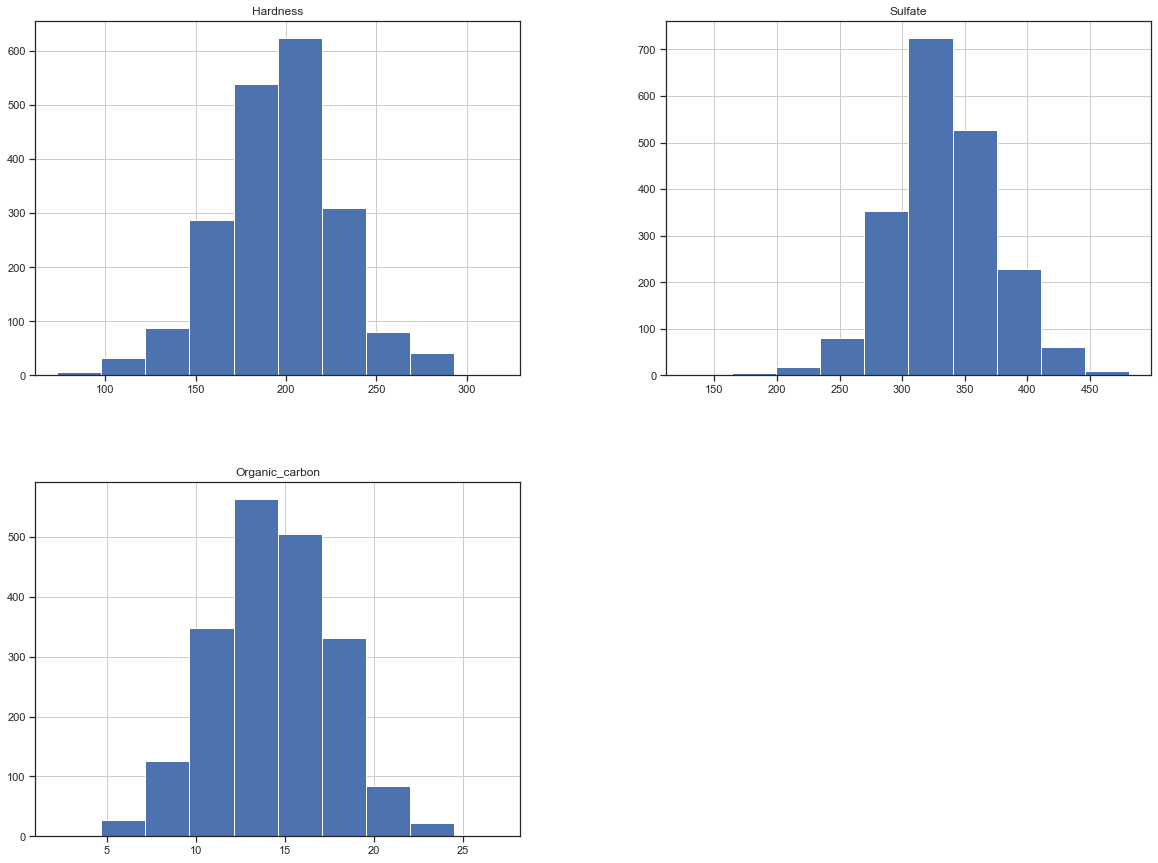

In [73]:
# Draw the frequency plots for each of the columns
freqplot = week7_data[['Hardness','Sulfate','Organic_carbon']]
freqplot.hist(figsize=(20,15))
plt.show()

# Inferences

# 1. Each of the columns (Hardness, suphate and organic carbon ) have a near to normal distribution. 

# 2. Hardness & sulphate have a slight skewed distribution towards left and right respectively whereas Organic carbon has almost a normal distribution

# 3. Standard deviations for the Hardness,sulphate and organic carbon are 32.6,	41.2 and 3.3 respectively. The std of organic carbon is low because its value range is low (between 2.7 and 27) 

<AxesSubplot:>

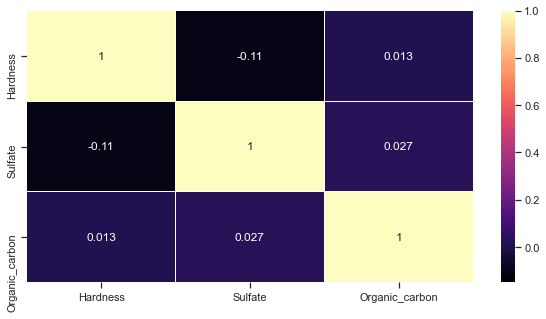

In [87]:
# Checking and plotting the heatmap of the mutual correlation coeffiecients for Hardness,sulphur and organic carbon
Week7_data_select = week7_data[['Hardness','Sulfate','Organic_carbon']]
Week7_Hard_Sulph_Orgcarbon_mutual_corr = Week7_data_select.corr()
plt.subplots(figsize=(10,5))
sns.heatmap(Week7_Hard_Sulph_Orgcarbon_mutual_corr,vmin=-.15,vmax=1,annot=True,linewidth=0.2,cmap='magma')

In [88]:
Week7_Hard_Sulph_Orgcarbon_mutual_corr

,Hardness,Sulfate,Organic_carbon
Hardness,1.000000,-0.108521,0.013224
Sulfate,-0.108521,1.000000,0.026776
Organic_carbon,0.013224,0.026776,1.000000


# Inference 
# As is evident from above plot and data
#    > Hardness and Sufphate have a low negative correlation (-0.1)
#    > Hardness and Organic Carbon have a very low positive correlation (0.01) 
#    > Organic carbon and Sulphate have a low positive correlation (0.02)

# 4. Carry out correlation analysis on the dataset and find the correlation factor between 
# a. ph and Chloramines
# b. ph and Conductivity
# What do we infer from this correlation value ?

<AxesSubplot:>

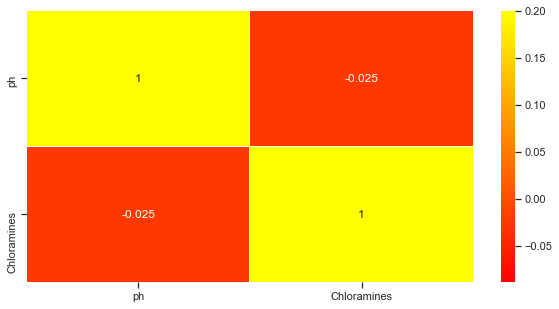

In [90]:
# Create the heat map between the correlation between each columns in the dataset
Week7_select_ph_chloramine = week7_data[['ph','Chloramines']]
Week7_ph_chloramine_corr = Week7_select_ph_chloramine.corr()
plt.subplots(figsize=(10,5))
sns.heatmap(Week7_ph_chloramine_corr,vmin=-.089,vmax=.2,annot=True,linewidth=0.2,cmap='autumn')

In [93]:
# Calculate carl pearson's correlation coefficient for ph and Chloramine
chloramine_values = week7_data['Chloramines']
ph_values = week7_data['ph']
Chloramine_ph_CP_Rho = np.corrcoef(chloramine_values,ph_values)[0,1]

#calculate Spearman Rank correlation and corresponding p-value
from scipy.stats import spearmanr
Chloramine_ph_SC_rho, Chloramine_ph_p = spearmanr(chloramine_values,ph_values)


In [94]:
Chloramine_ph_CP_Rho

-0.024768491224521388

In [95]:
Chloramine_ph_SC_rho

-0.0381672027255926

In [96]:
Chloramine_ph_p

0.08705601438432194

# The rho values for both Carl pearson's and Spearman's coefficient indicates that there is a low negative correlation between the Chloramines and ph . 

# However, since the p-value of the correlation is not less than 0.05, the correlation between ph and Chloramine is not statistically significant.

<AxesSubplot:>

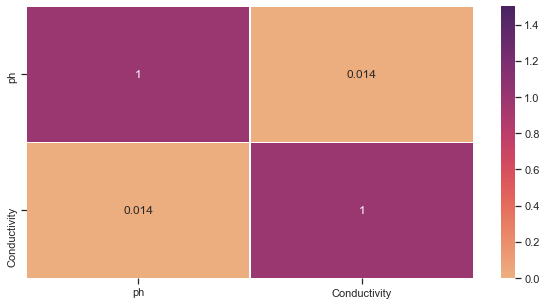

In [100]:
# Create the heat map between the correlation between each columns in the dataset
Week7_select_ph_cond = week7_data[['ph','Conductivity']]
Week7_ph_cond_corr = Week7_select_ph_cond.corr()
plt.subplots(figsize=(10,5))
sns.heatmap(Week7_ph_cond_corr,vmin=-.002,vmax=1.5,annot=True,linewidth=0.2,cmap='flare')

In [97]:
# Calculate Cal pearsons correlation coefficient between conductivity and ph
Conductivity_values = week7_data['Conductivity']
CP_Rho_Cond_ph = np.corrcoef(Conductivity_values,ph_values)[0,1]

In [48]:
CP_Rho_Cond_ph

0.01412784840109935

In [49]:
# Calculate spearman's coffecient and p-value between conductivity and ph
SC_rho_Cond_ph , p_Cond_ph = spearmanr(Conductivity_values,ph_values)

In [50]:
SC_rho_Cond_ph

0.008990677678512814

In [51]:
p_Cond_ph

0.6869945840618119

# The rho values for both Carl pearson's and Spearman's coefficient indicates that there is a low positive correlation between the Conductivity and ph . 

# However, since the p-value of the correlation is not less than 0.05, the correlation between ph and Conductivity is not statistically significant.

In [ ]:
# Submitted by Viswaraj Naduvath Chandran, Aneesh Akkaramannil & harikrishnan Bhuvanendran